<a href="https://colab.research.google.com/github/khus158/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [ ]:
dataset.shape


(2919, 13)

In [ ]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 6
Float variables: 3


<Axes: >

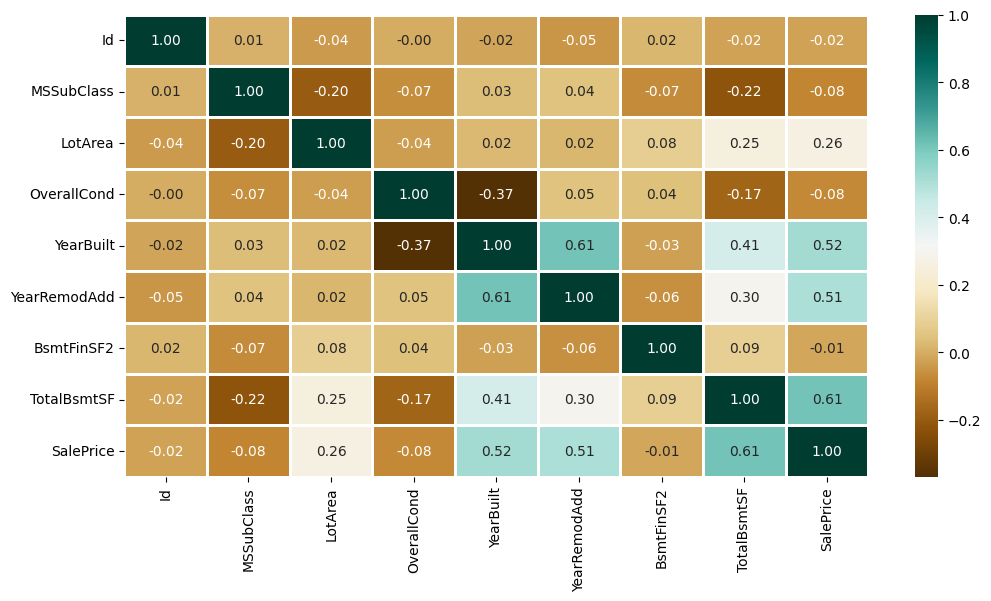

In [ ]:
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']) # Select only numeric columns
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_cols.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)


<ipython-input-28-fa719f1f6fe0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=object_cols, y=unique_values, palette=colors)


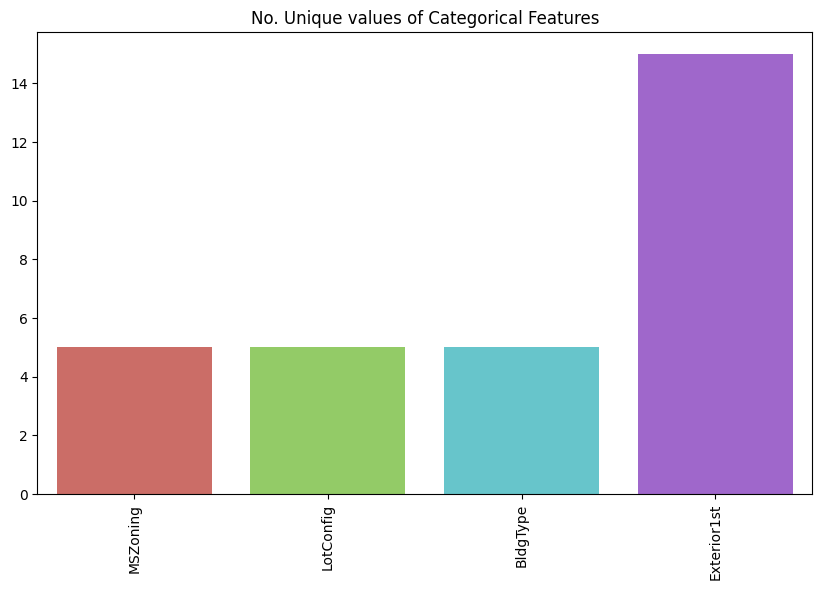

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].nunique())  # Using nunique() instead of unique().size for efficiency

plt.figure(figsize=(10, 6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)

# Define colors for each bar
colors = sns.color_palette("hls", len(object_cols))  # Generate a list of distinct colors

# Plot the bar graph with specified colors
sns.barplot(x=object_cols, y=unique_values, palette=colors)

plt.show()



<ipython-input-35-b03722fed085>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(11, 4, index)


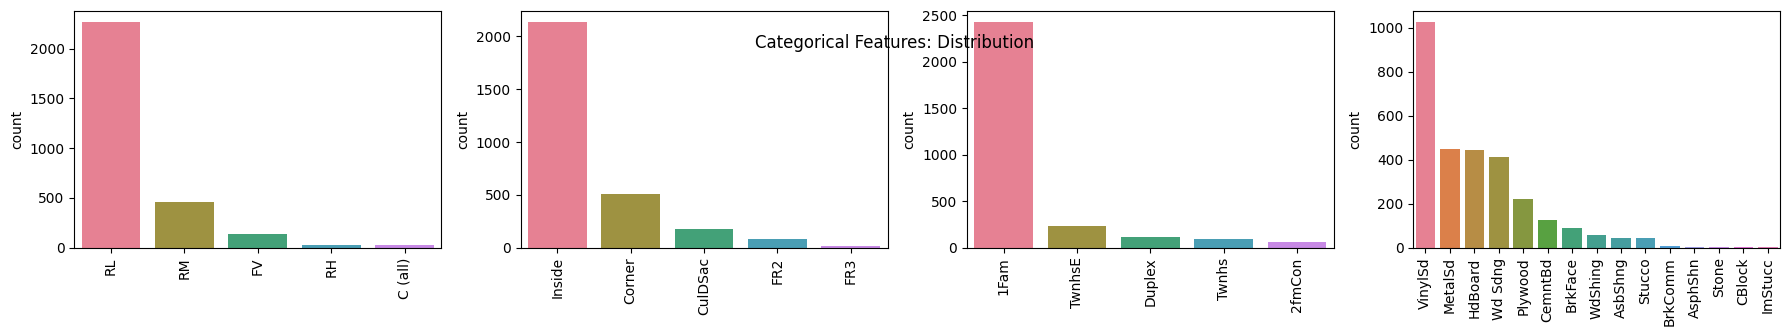

In [ ]:
plt.figure(figsize=(18, 36))
plt.suptitle('Categorical Features: Distribution')  # Use suptitle for the main title
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    ax = plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y, hue=y.index, palette="husl", ax=ax, legend=False)  # Change the color here
    index += 1


plt.tight_layout()  # Adjust layout to prevent overlapping subplots
plt.show()


In [ ]:
dataset.drop(['Id'],
			axis=1,
			inplace=True)


In [ ]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())


In [ ]:
new_dataset = dataset.dropna()


In [ ]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [ ]:
# Fit and transform the OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False)
OH_encoded = OH_encoder.fit_transform(new_dataset[object_cols])

# Extracting the names of the one-hot encoded features
feature_names = OH_encoder.get_feature_names_out(input_features=object_cols)

# Creating a DataFrame with the one-hot encoded features and appropriate column names
OH_cols = pd.DataFrame(OH_encoded, columns=feature_names, index=new_dataset.index)

# Concatenate the one-hot encoded features with the original dataset
df_final = pd.concat([new_dataset.drop(object_cols, axis=1), OH_cols], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.19190745680267038

In [ ]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18741683841599854


In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 1.9 MB/s eta 0:00:00


In [ ]:
# This code is contributed by @amartajisce
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score


Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 2.06ms	remaining: 2.06s
1:	learn: 55780.1567575	total: 4.04ms	remaining: 2.02s
2:	learn: 55060.9599505	total: 6.02ms	remaining: 2s
3:	learn: 54456.1126921	total: 7.75ms	remaining: 1.93s
4:	learn: 53901.1464265	total: 9.73ms	remaining: 1.94s
5:	learn: 53334.6062357	total: 11.6ms	remaining: 1.92s
6:	learn: 52824.4943646	total: 13.5ms	remaining: 1.91s
7:	learn: 52381.4267520	total: 15.4ms	remaining: 1.9s
8:	learn: 51841.0364316	total: 17.4ms	remaining: 1.91s
9:	learn: 51281.5852560	total: 19.3ms	remaining: 1.91s
10:	learn: 50825.3817438	total: 21.3ms	remaining: 1.91s
11:	learn: 50477.2609796	total: 23.1ms	remaining: 1.91s
12:	learn: 50081.4097641	total: 25.2ms	remaining: 1.92s
13:	learn: 49663.6380360	total: 27.1ms	remaining: 1.91s
14:	learn: 49334.5782662	total: 29.1ms	remaining: 1.91s
15:	learn: 48967.5221026	total: 32.4ms	remaining: 2s
16:	learn: 48676.4063222	total: 34.6ms	remaining: 2s
17:	learn: 48359.1169955	total: 36.5ms

NameError: name 'r2_score' is not defined